Author- aatamgajjar

Date Prepared: 12/8/24



# 1. Introduction

## Key Deliverables

The main goal is to predict high-traffic recipes with at least 80% accuracy.

- **Predict High-Traffic Recipes:** Build a predictive model that accurately classifies recipes based on high or low traffic.
- **Achieve 80% Accuracy (if possible):** The target is to reach a minimum of 80% accuracy. If not achieved, further optimization will be performed.
- **Outputs Required:**
  - **Written Report:** Summarize the methodology, analysis, and findings.
  - **8-10 Slide Presentation:** Key results for the product manager.
- **Timeline:** The project is expected to be completed by **the end of the month**.

## Dataset

Before proceeding with model development, understanding the dataset is crucial.

#### Key Columns:
- **recipe:** Recipe identifier.
- **calories, carbohydrates, sugar, protein:** Nutritional features of the recipes.
- **category:** Categorical feature representing recipe type (may need encoding).
- **high_traffic:** The target variable (binary classification).

#### Cleaning and Validation:
- Identify missing values and handle them appropriately.
- Validate numerical data formats.
- One-hot encode the category variable.
- Identify and handle outliers or extreme values.

### Dataset Description Table

| Column Name       | Description                                                                | Data Type   |      
|-------------------|----------------------------------------------------------------------------|-------------|
| **``recipe``**    | unique identifier of recipe.                                                         | Numeric      |                                          |
| **``calories``**       | Caloric content of the recipe.                                              | Numeric       | 
| **``carbohydrate``**  | Carbohydrate content in grams.                                             | Numeric       | 
| **``sugar``**          | Sugar content in grams.                                                    | Numeric       | 
| **``protein``**        | Protein content in grams.                                                  | Numeric       | 
| **``category``**       | Category or type of recipe. Recipes are listed in one of ten possible groupings (Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal').        | String      |        
| **``servings``** | Number of servings         | Numeric      | 
| **``high_traffic``**   | if the traffic to the site was high when this recipe was shown, this is marked with “High”. | String | 


# 2. Data Importing and Validation

In [190]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
# Read Datafile
data = 'recipe_site_traffic_2212.csv'
df = pd.read_csv(data, index_col = 'recipe')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


In [114]:
df.head()

calories  carbohydrate  sugar  protein   category servings high_traffic
recipe                                                                         
1            NaN           NaN    NaN      NaN       Pork        6         High
2          35.48         38.56   0.66     0.92     Potato        4         High
3         914.28         42.68   3.09     2.88  Breakfast        1          NaN
4          97.03         30.56  38.63     0.02  Beverages        4         High
5          27.05          1.85   0.80     0.53  Beverages        4          NaN

In [115]:
# Check unique values for categorical columns
print("category unique values:", df['category'].unique())
print("high_traffic unique values:",  df['high_traffic'].unique())
print("servings unique values:",  df['servings'].unique())

category unique values: ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
high_traffic unique values: ['High' nan]
servings unique values: ['6' '4' '1' '2' '4 as a snack' '6 as a snack']


The columns ``category`` and ``servings`` do not meet the provided data description. The target variable ``high_traffic`` has either 'High' or nan which also needs to be replaced to binary.

### Preprocessing NANs

In [116]:
df.isna().sum()

calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

There are 59 null values in ``calories``, ``carbohydrate``, ``sugar``, and ``protein``.

We can directly drop the rows contatining NANs for the columns: ``calories``, ``carbohydrate``, ``sugar``, and ``protein``.

We will also replace ``high_traffic`` to binary.


In [117]:
df.dropna(subset = ['calories', 'carbohydrate', 'sugar', 'protein'], inplace = True)
df['traffic'] = np.where(df['high_traffic'] == 'High', 1, 0)
print(df.isna().sum())
print("df shape:", df.shape)
df[['traffic', 'high_traffic']].head()

calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    360
traffic           0
dtype: int64
df shape: (895, 8)


traffic high_traffic
recipe                      
2             1         High
3             0          NaN
4             1         High
5             0          NaN
6             1         High

In [118]:
# Drop the redundant "high_traffic" column 
df = df.drop(columns=['high_traffic'])

# Replace '4 as a snack' with '4' and '6 as a snack' with '6'
df['servings'] = df['servings'].replace({'4 as a snack': '4', '6 as a snack': '6'})

# Convert 'servings' column to float
df['servings'] = df['servings'].astype(int)
# Replace 'Chicken Breast' with 'Chicken' 
df['category'] = df['category'].replace({'Chicken Breast': 'Chicken'})

# Confirm changes
print("category unique values:", df['category'].unique())
print("servings unique values:", df['servings'].unique())

# Change servings and category into categorical dtype
df['category'] = df['category'].astype('category')
df['servings'] = df['servings'].astype('category')

print(df.info())  # Check data type

category unique values: ['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken' 'Lunch/Snacks'
 'Pork' 'Vegetable' 'Meat' 'Dessert']
servings unique values: [4 1 2 6]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 2 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   calories      895 non-null    float64 
 1   carbohydrate  895 non-null    float64 
 2   sugar         895 non-null    float64 
 3   protein       895 non-null    float64 
 4   category      895 non-null    category
 5   servings      895 non-null    category
 6   traffic       895 non-null    int64   
dtypes: category(2), float64(4), int64(1)
memory usage: 44.3 KB
None


Now the data matches the description provided to us and ready for preprocessing. 

## Handling outliers

We will look for outliers using the IQR method and visualize the data distribution for numerical values.  Outliers, which represent rare deviations from typical data points, are shown in the plots

In [119]:
df_before =df.copy()
# Handling Outliers
def handle_outlier(df,col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

df_num = df.select_dtypes(include = ["float64", "int64"])

for column in df_num.columns:
    handle_outlier(df, column)

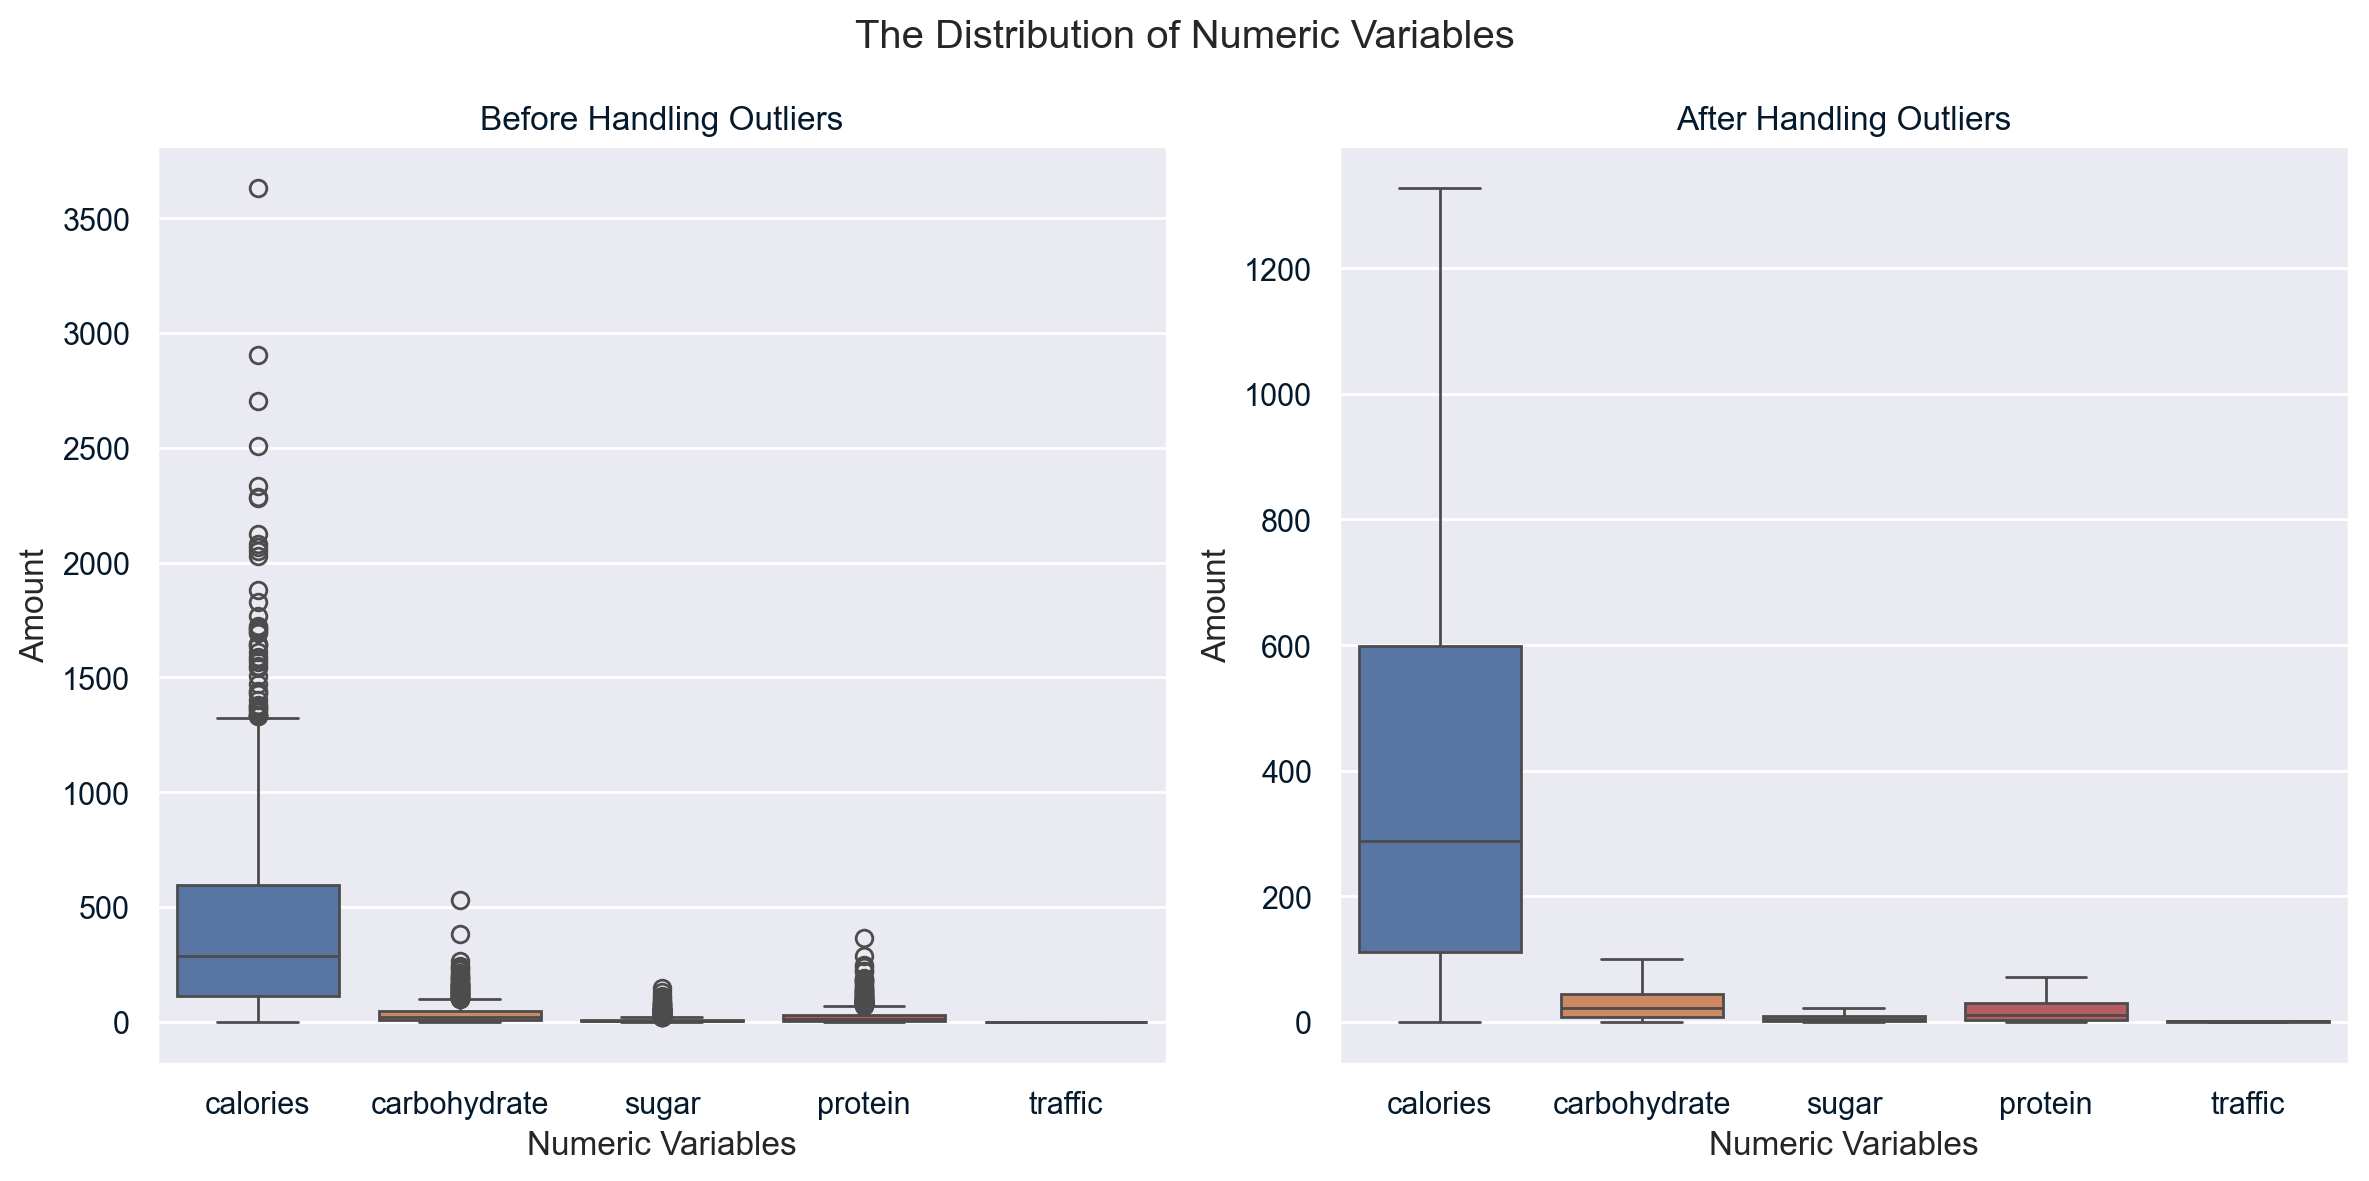

In [120]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(df_before,ax=axes[0])
sns.boxplot(df,ax=axes[1])
axes[0].set_title("Before Handling Outliers")
axes[1].set_title("After Handling Outliers")
fig.suptitle("The Distribution of Numeric Variables")
axes[0].set_xlabel("Numeric Variables")
axes[1].set_xlabel("Numeric Variables")
axes[0].set_ylabel("Amount")
axes[1].set_ylabel("Amount")
plt.tight_layout()
plt.show()

In order to handle these outliers, we replace them with the acceptable values in the IQR range. 

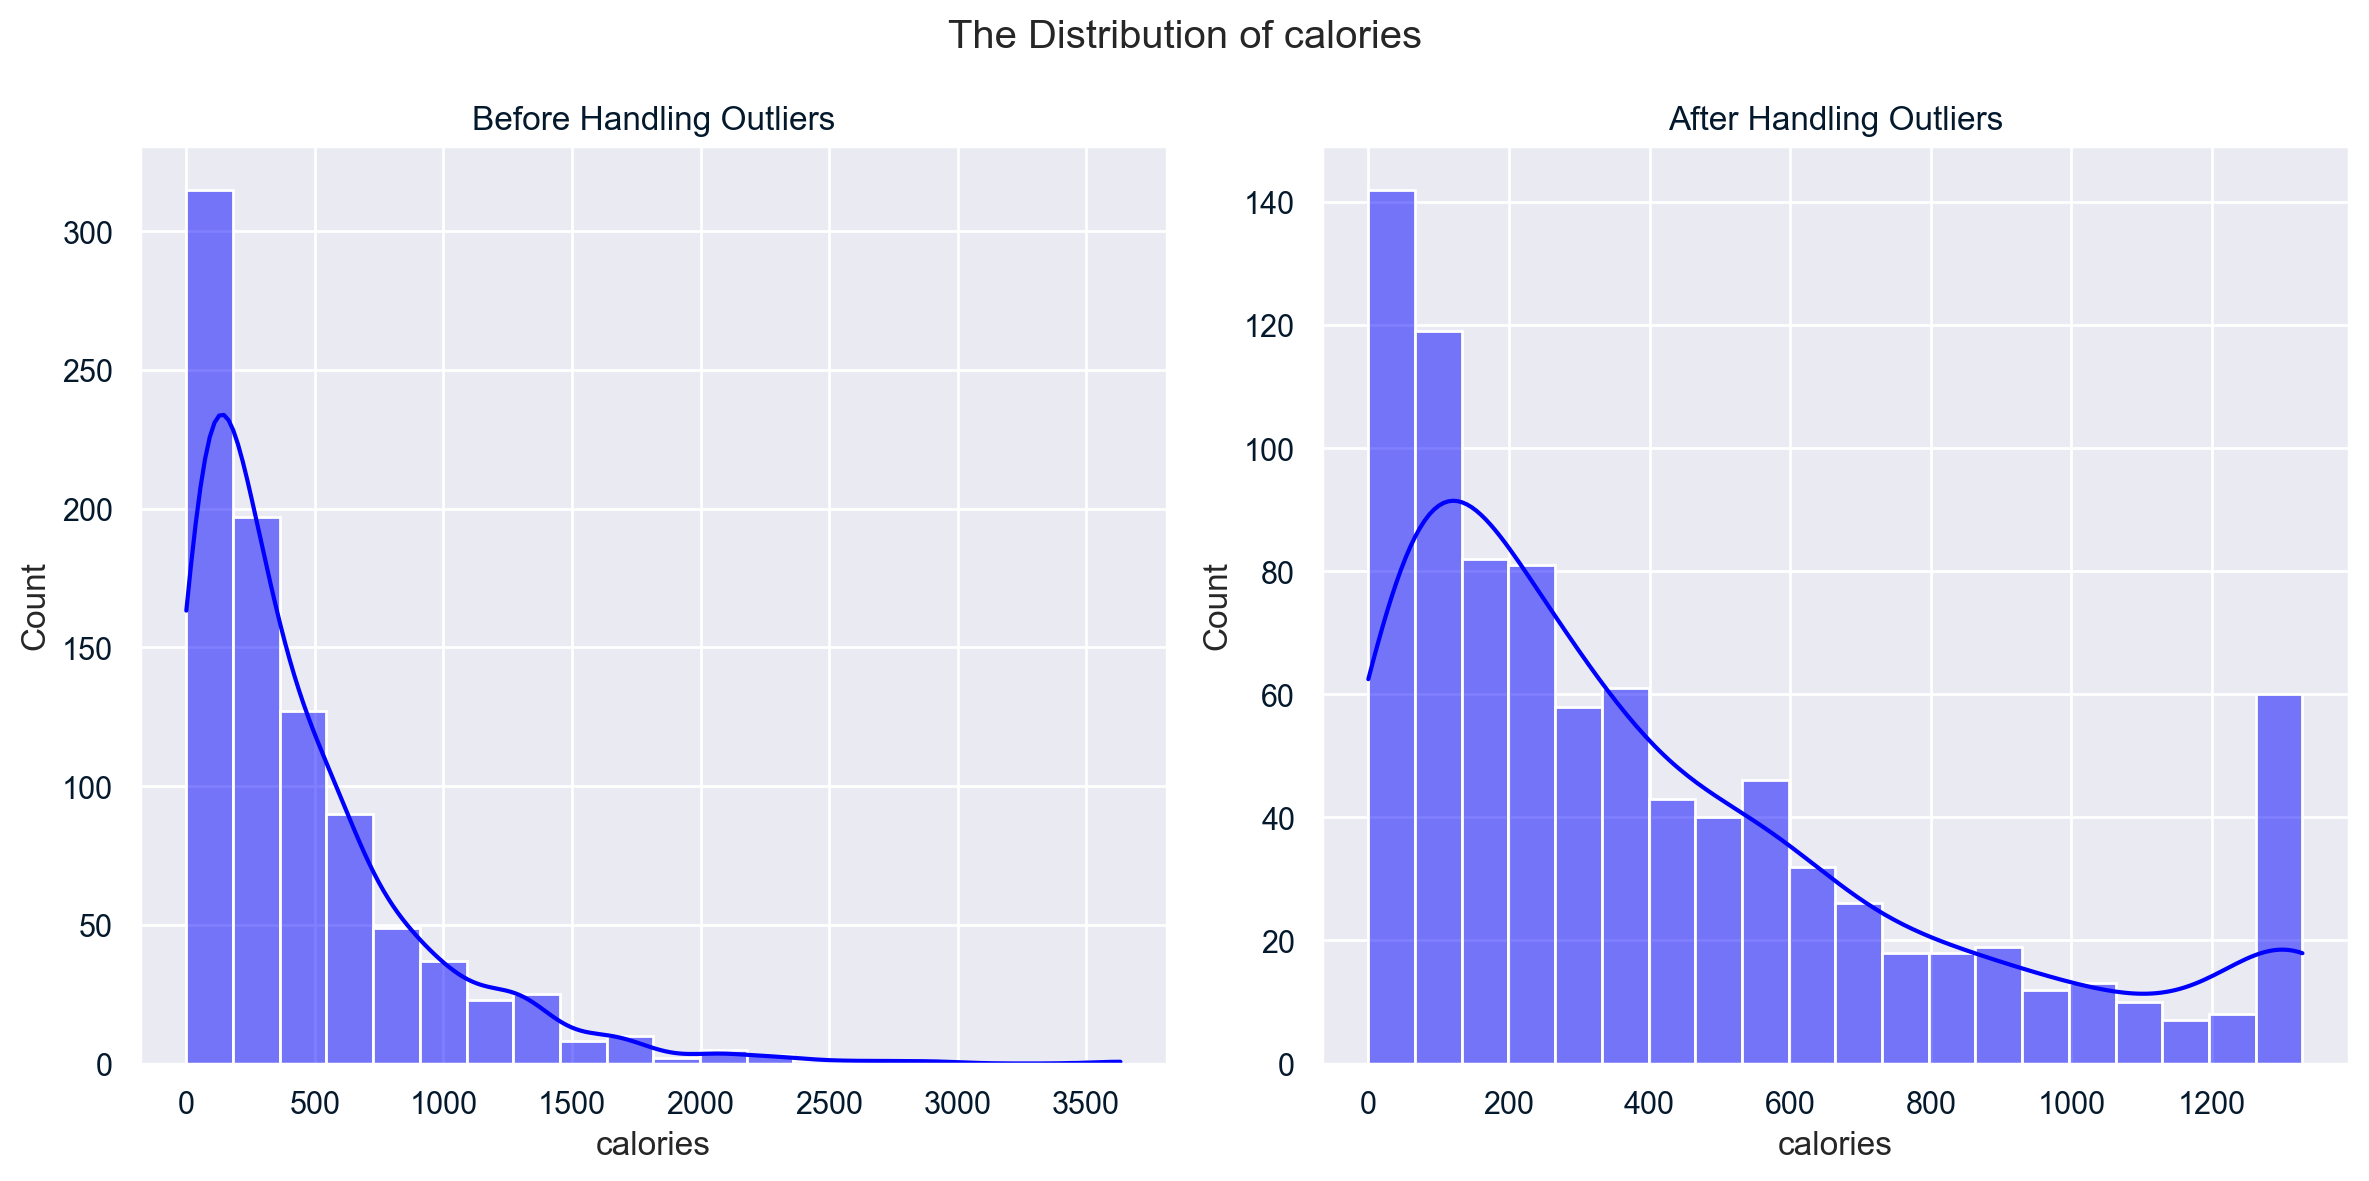

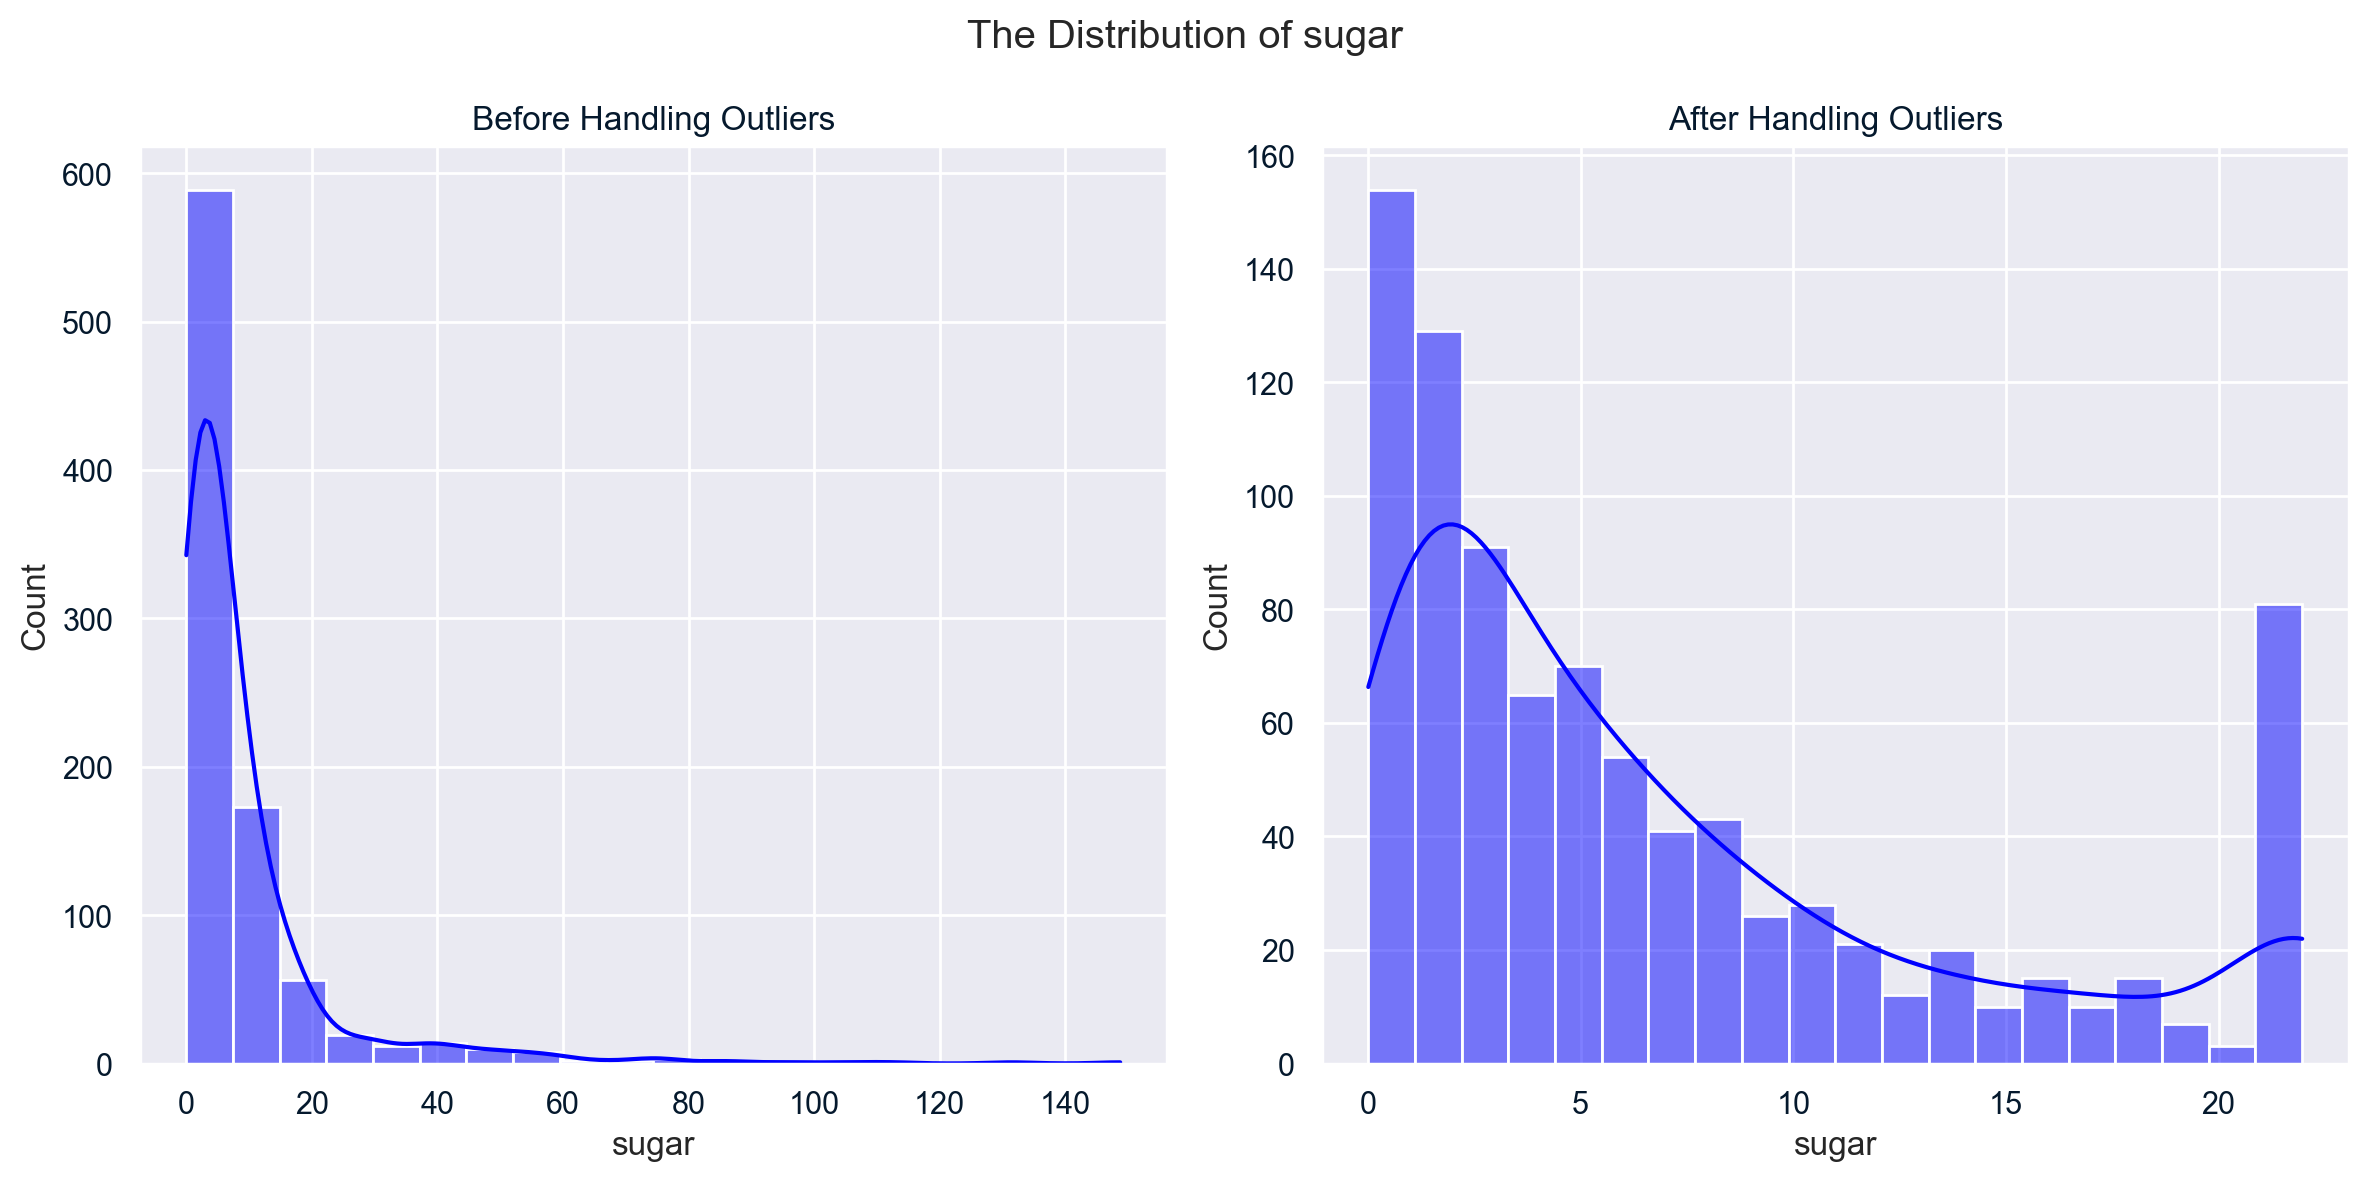

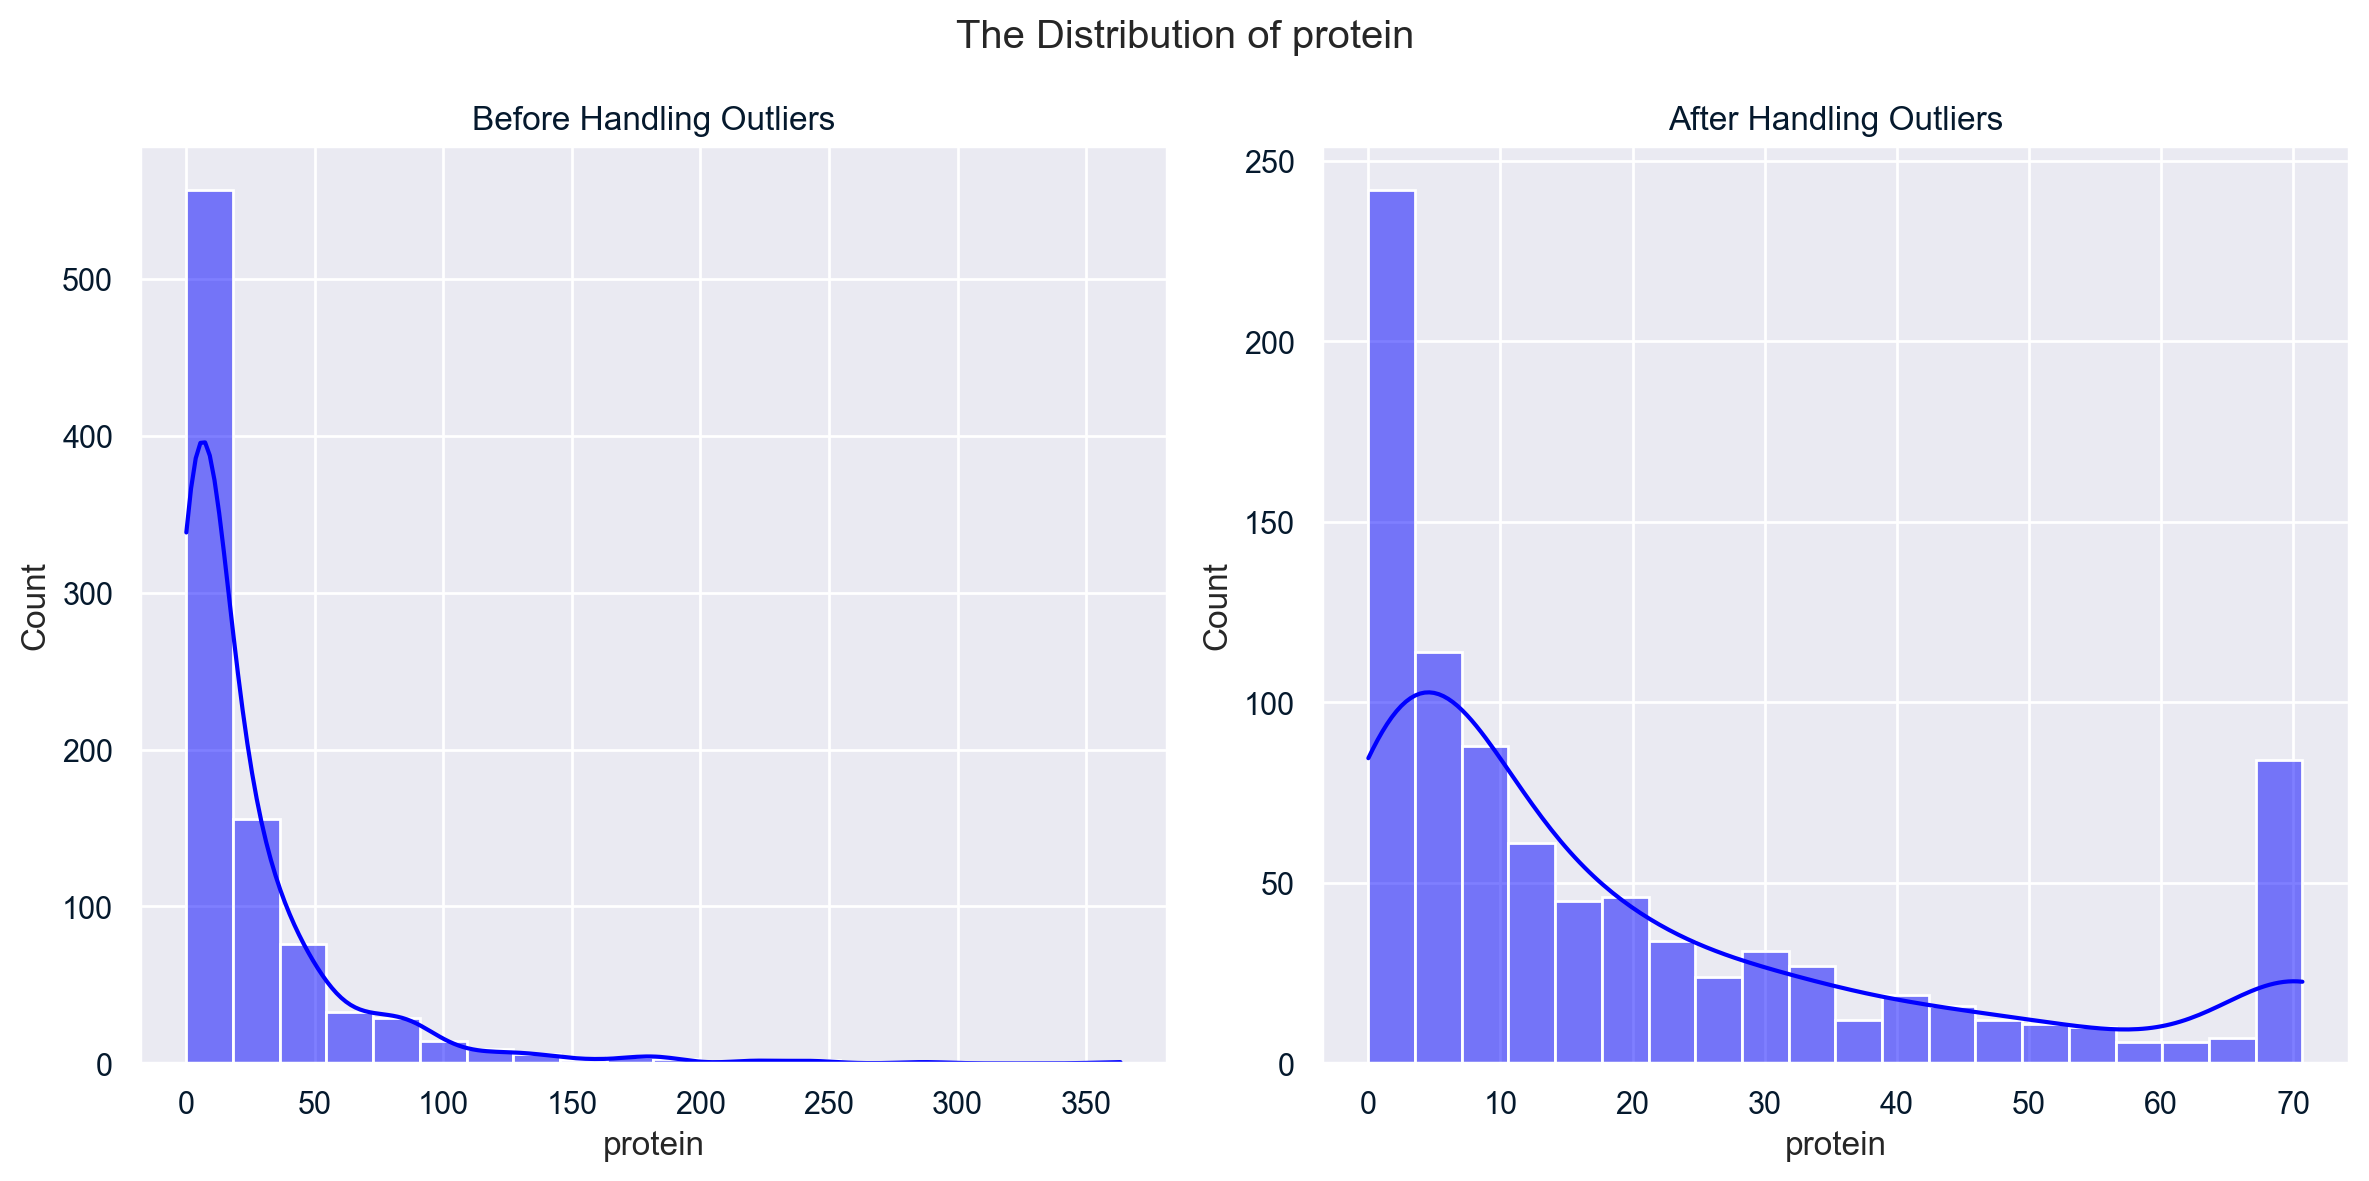

In [121]:
numeric_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

for col in numeric_columns:
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  sns.histplot(df_before[col], kde=True, color='blue',ax=axes[0], bins=20)
  sns.histplot(df[col], kde=True, color='blue',ax=axes[1], bins=20)
  axes[0].set_title("Before Handling Outliers")
  axes[1].set_title("After Handling Outliers")
  fig.suptitle('The Distribution of '+col)
  plt.tight_layout()
  plt.show()

Outliers in our data may result from complex recipes requiring unusual ingredient amounts or larger recipe sizes. These visualizations display the distribution of numerical values before and after handling outliers. It's evident that all values exhibit a right-skewed distribution.

# 3. Exploratory Data Analysis

In [122]:
df.head()

calories  carbohydrate   sugar  ...       category servings traffic
recipe                                  ...                                
2          35.48         38.56   0.660  ...         Potato        4     1.0
3         914.28         42.68   3.090  ...      Breakfast        1     0.0
4          97.03         30.56  21.965  ...      Beverages        4     1.0
5          27.05          1.85   0.800  ...      Beverages        4     0.0
6         691.15          3.46   1.650  ...  One Dish Meal        2     1.0

[5 rows x 7 columns]

## Target Variable - ``traffic``

Since we aim to predict which recipes will attract traffic, the 'traffic' variable will be our target variable. The chart below displays the distribution of 'High' and 'Low' categories in this variable, revealing an unbalanced dataset, with 60% of the data belonging to the 'High' class and 40% to the 'Low' class.

In [123]:
value_counts = df['traffic'].value_counts()
percentage = (value_counts / value_counts.sum()) * 100
print(percentage)

1.0    59.776536
0.0    40.223464
Name: traffic, dtype: float64


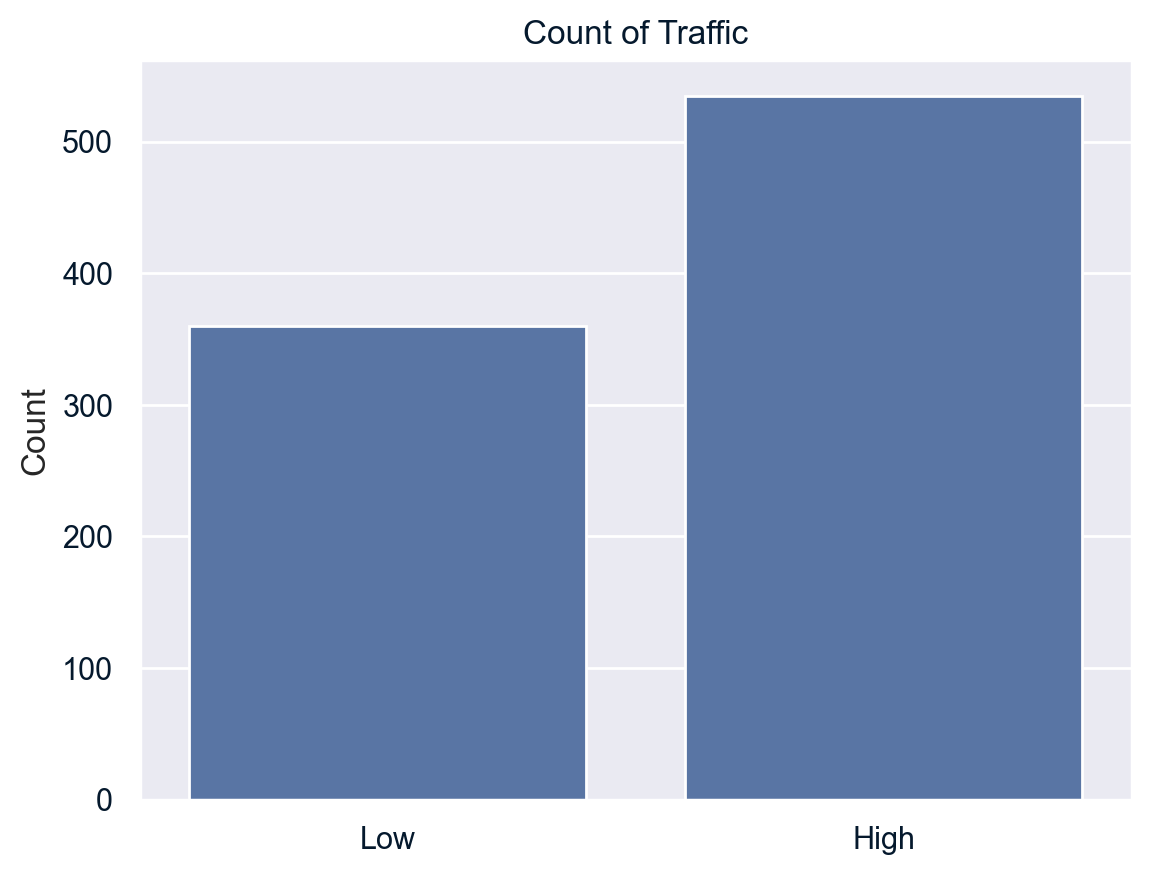

In [124]:
cou=sns.countplot(x='traffic', data=df) 
cou.set_title('Count of Traffic')
plt.ylabel('Count')
plt.xlabel('')
cou.set_xticklabels(['Low', 'High'])
plt.show()

## Numeric Variables - ``calories``, ``carbohydrate``, ``sugar``, ``protein``
From the heatmap below, we can conclude that there is a positive relationship between protien and calories, a negative relationship between protien and sugar.

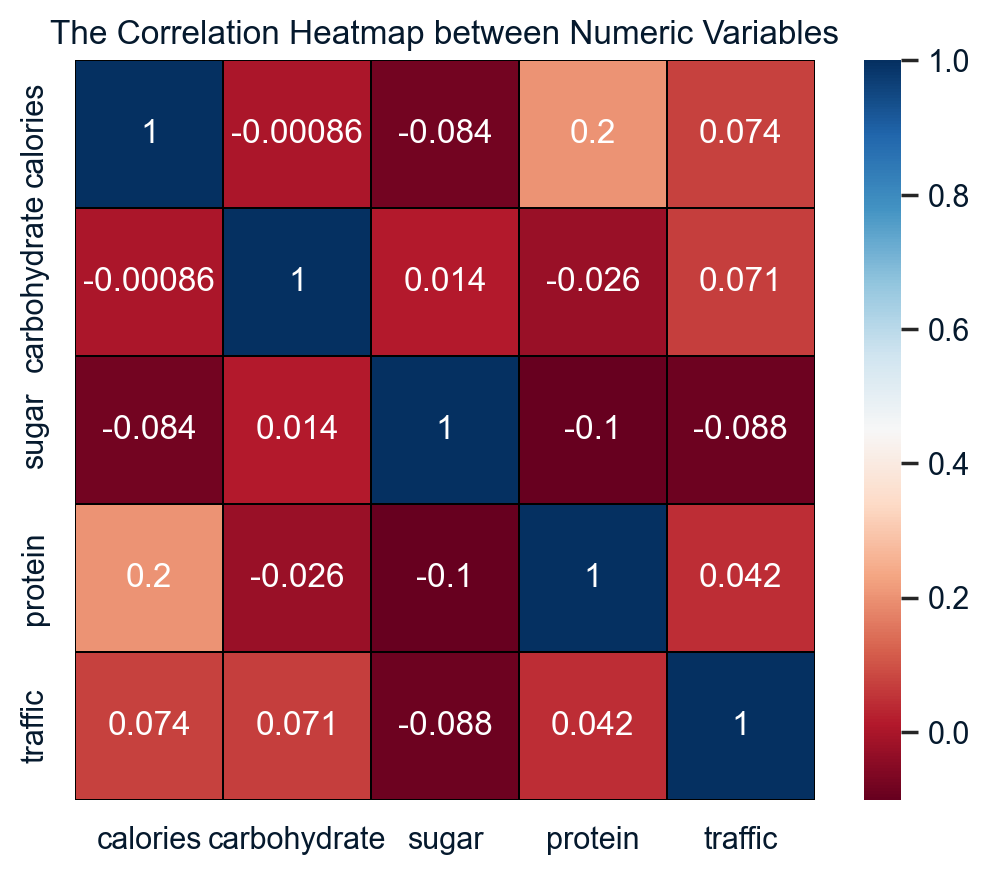

In [125]:
heat=sns.heatmap(df.corr(), annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")
heat.set_title("The Correlation Heatmap between Numeric Variables")
plt.show()

## Relationship between Numeric Variables & Target 

To discover the relationship between a target variable and a numerical variables, I decided to make boxplot to investigate the relationship between calories, carbohydrate, sugar, protein and our target varible - traffic. From the plots below, we can observe that the 'high' traffic category exhibits higher levels of calories, carbohydrate and protein compared to the 'low' traffic category, the opposite of the distribution plan for sugar, often because people prefer less sweet foods.

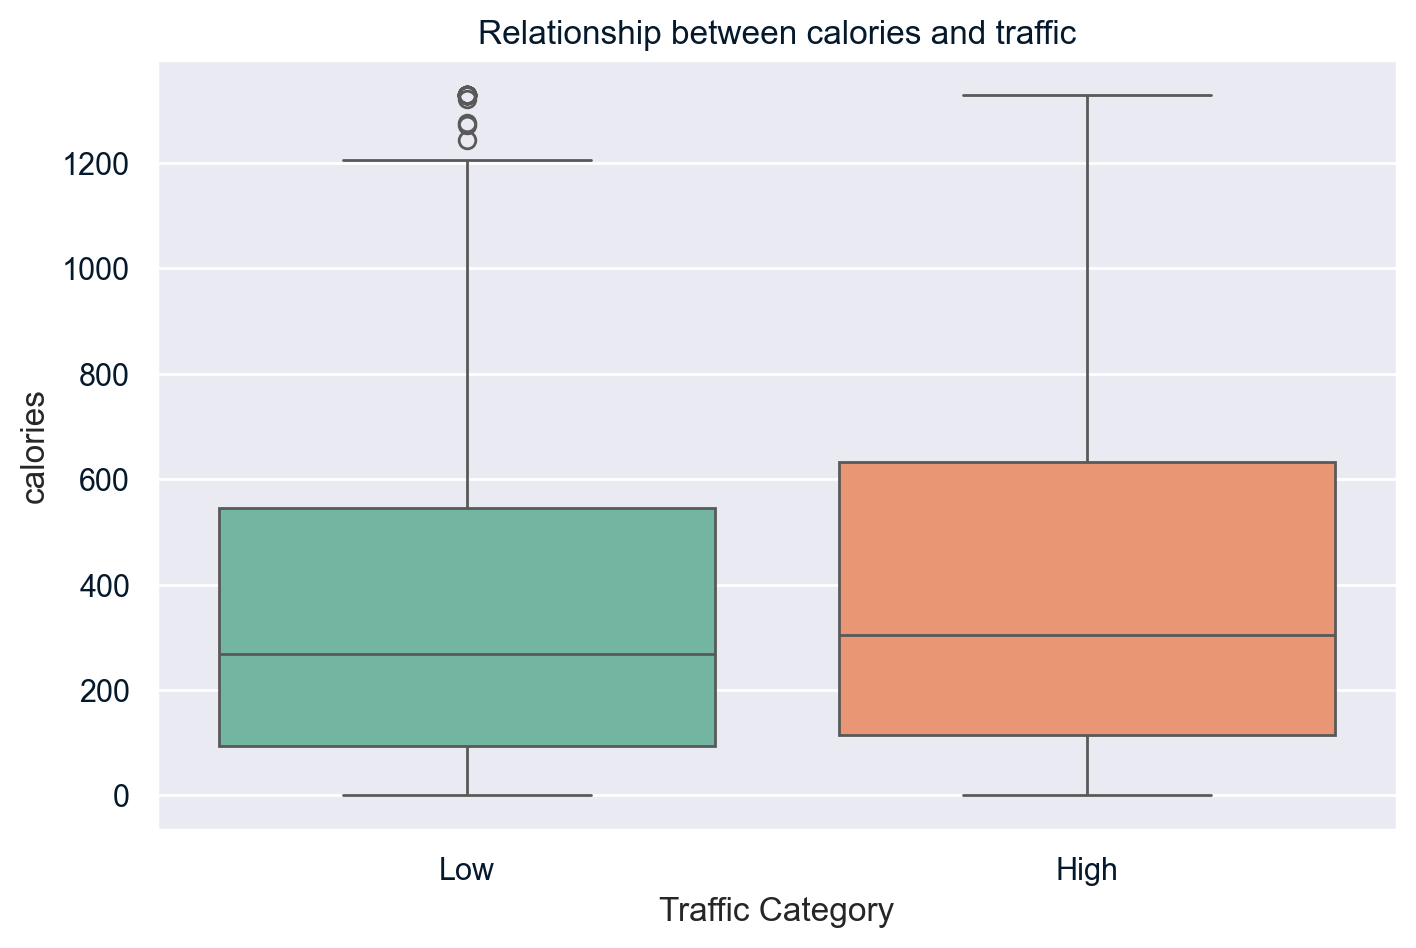

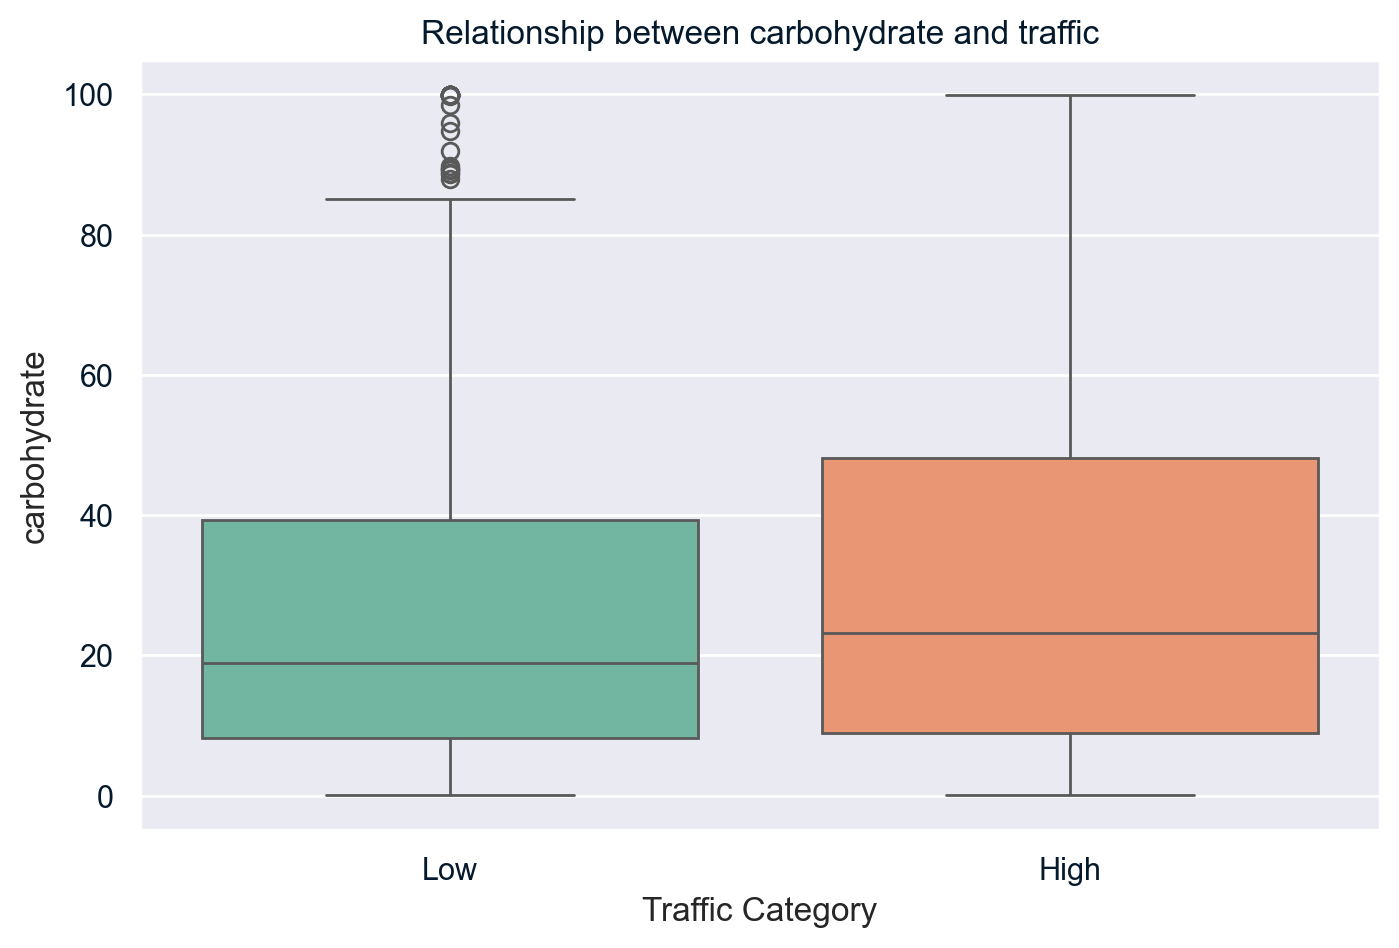

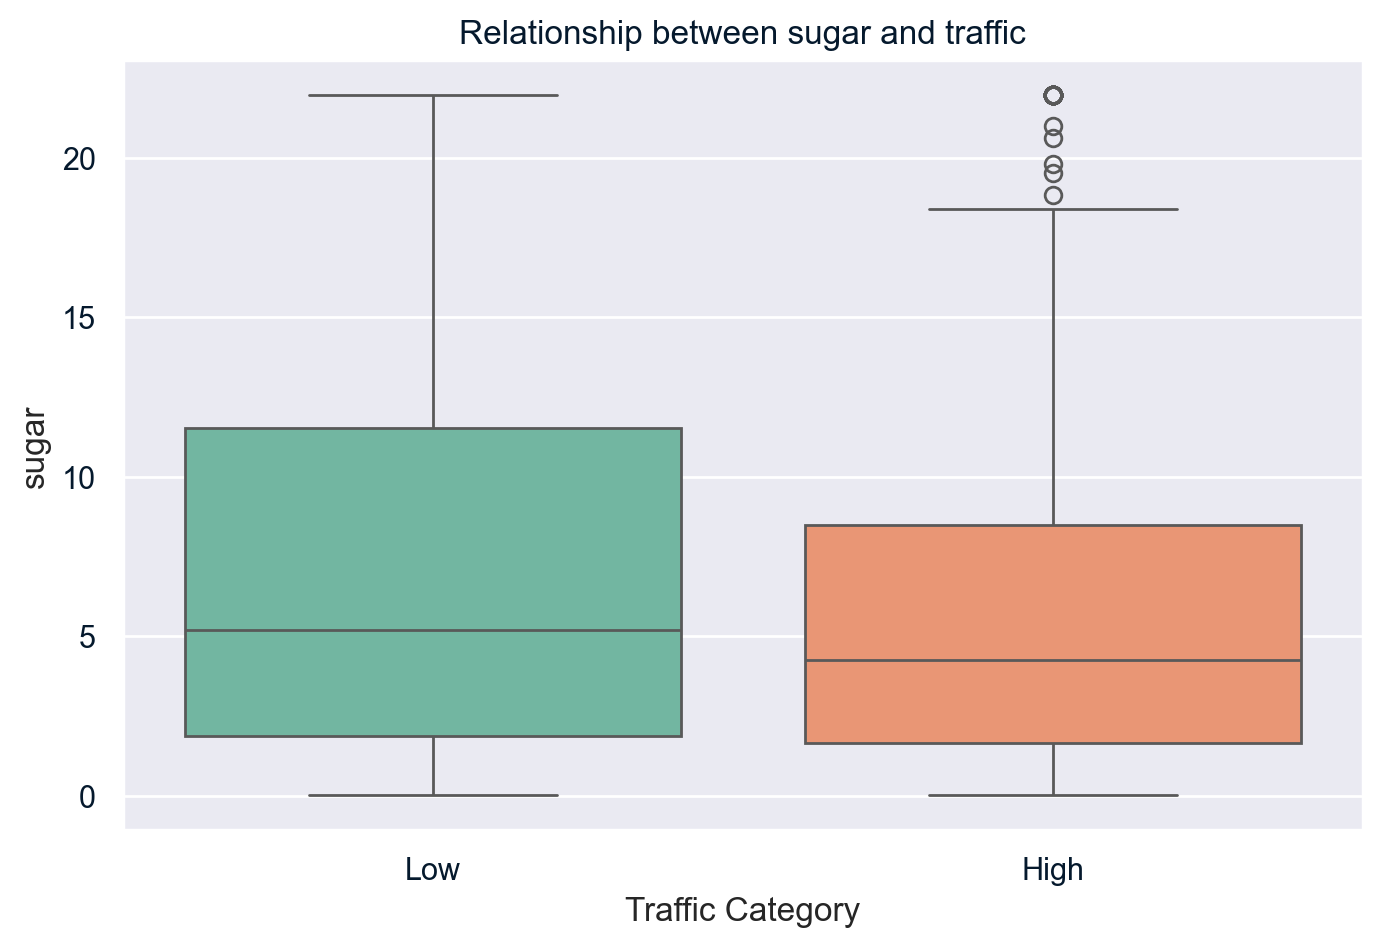

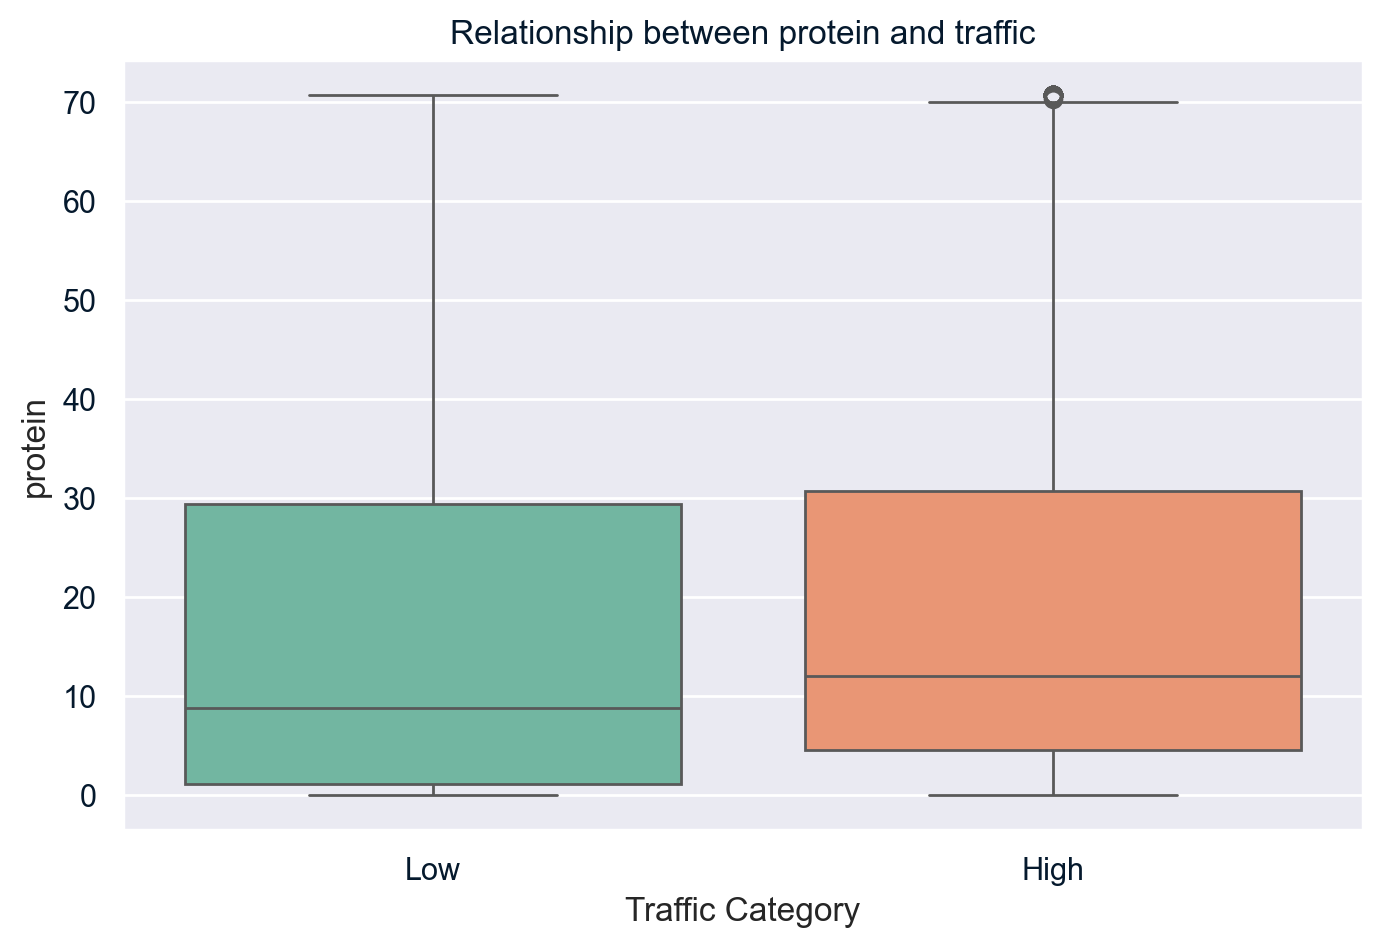

In [126]:
# target columns
target = 'traffic'

# Create boxplots
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=target, y=col, palette='Set2')
    plt.title(f'Relationship between {col} and {target}')
    plt.xlabel('Traffic Category')
    plt.ylabel(col)
    plt.xticks([0,1],['Low', 'High'])
    plt.show()

In [142]:
df_copy = df.copy()


# Replace 0 and 1 with "Low" and "High"
df_copy['Traffic'] = df_copy['traffic'].map({0: 'Low', 1: 'High'})
df_copy.drop(['traffic'], axis =1,inplace =True)
# Create the pairplot with the updated labels
pair_plot = sns.pairplot(data=df_copy, hue="Traffic")
plt.show()

## Categorical Variables - ``category``, ``servings``

From the bar chart below, it's evident that the most common recipe category is 'Chicken.' Also, the most common serving number is 4.

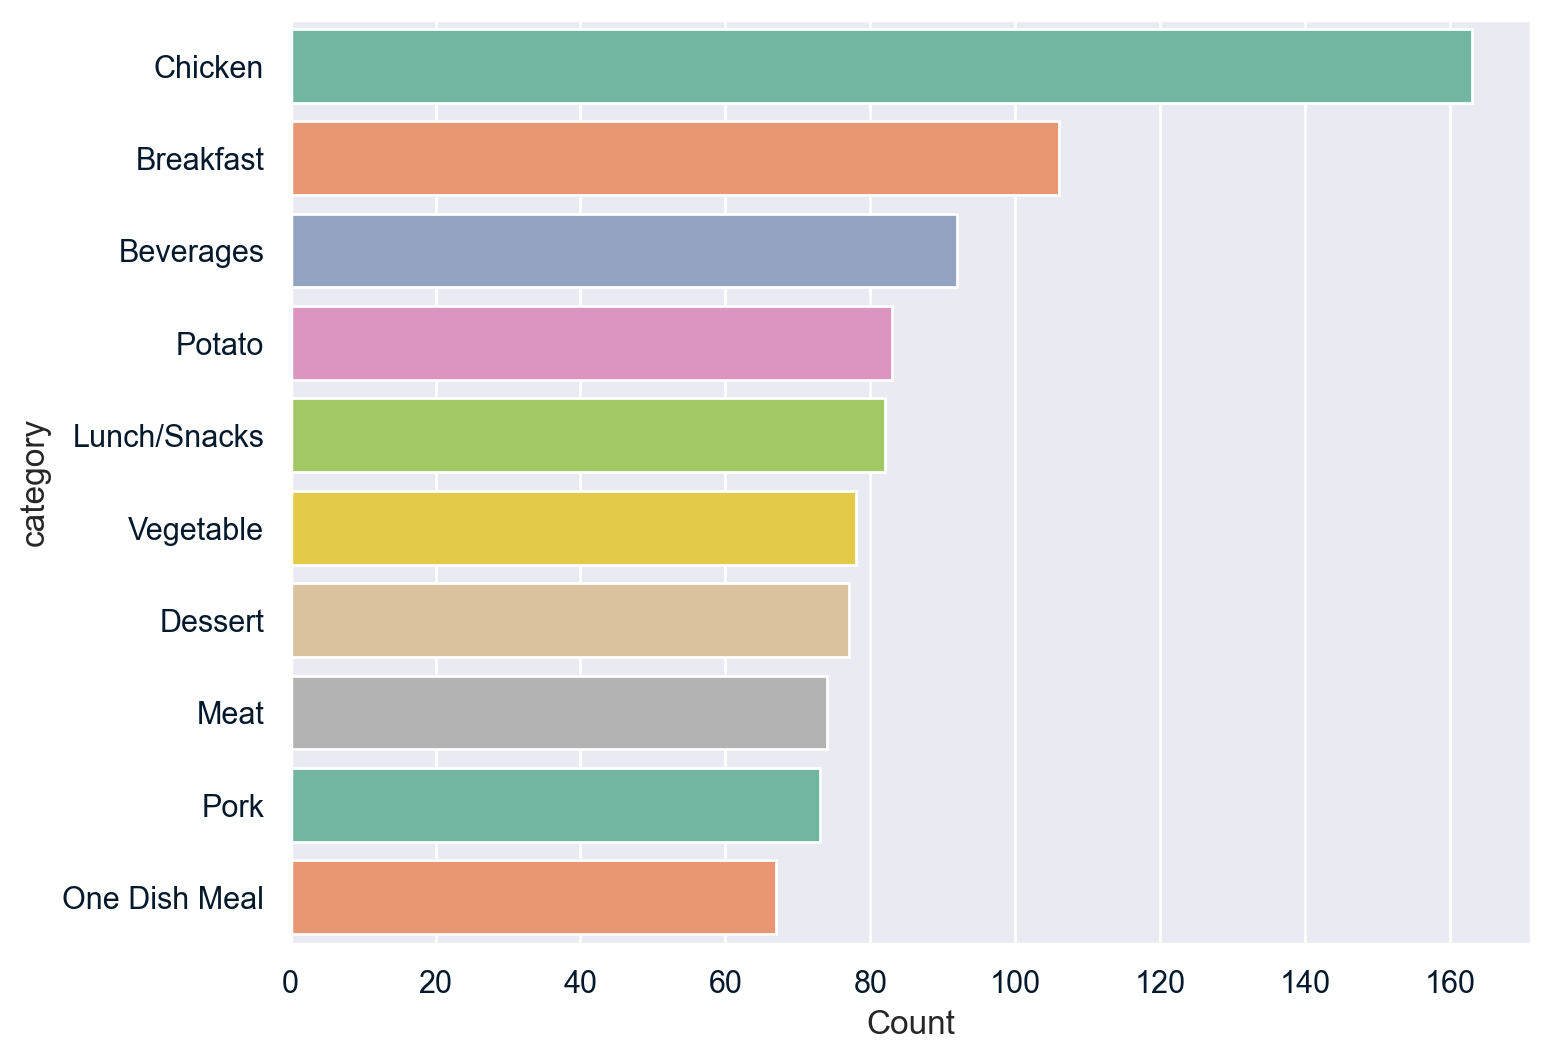

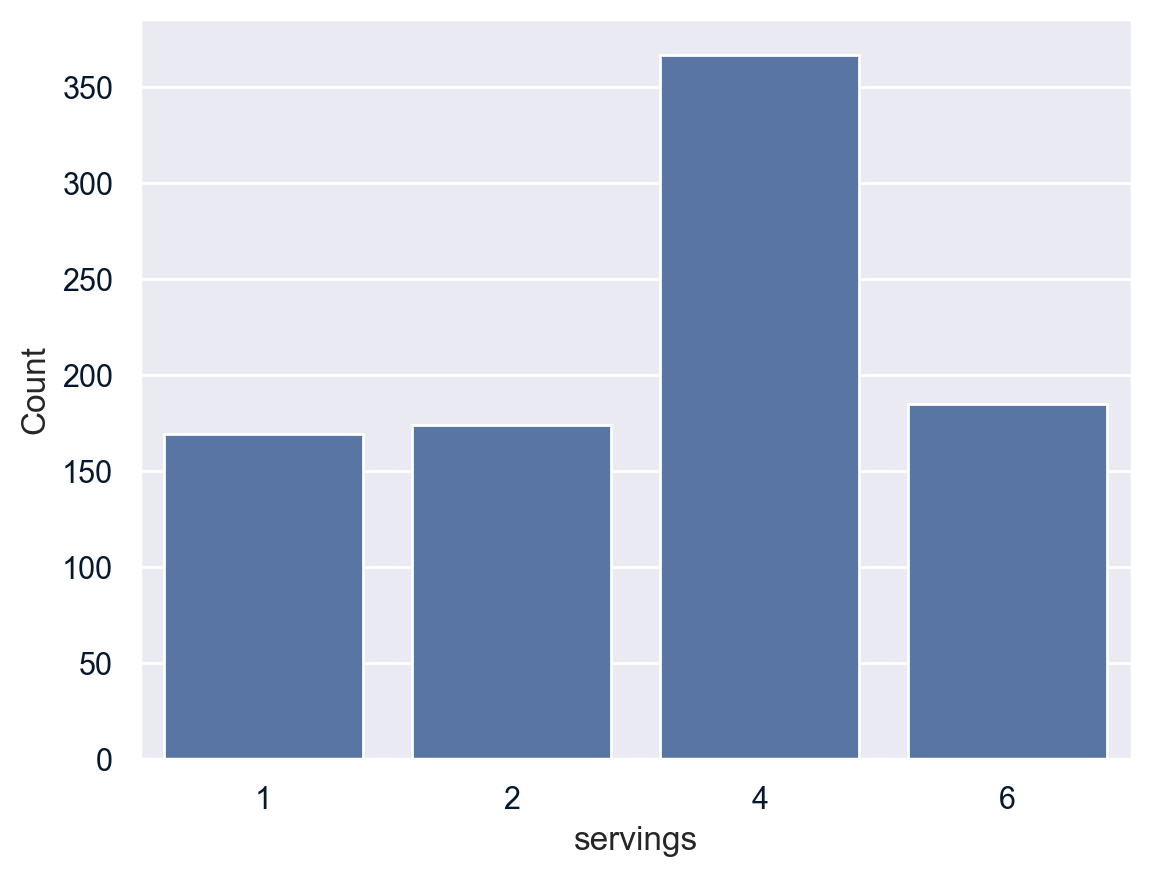

In [136]:
plt.figure(figsize=(8, 6))
cou=sns.countplot(y='category', data=df, palette="Set2",order=df['category'].value_counts().index)
plt.xlabel('Count')
plt.show()

cou=sns.countplot(x='servings', data=df)
plt.ylabel('Count')
plt.show()

### Relationship between Categorical Variables & Target - ``category``, ``servings`` & ``traffic``

The following chart depicts the distributions between ``category``, and ``servings`` for target ``traffic``. Notably, we observe a strong relationship between the traffic variable and the category variable. 'Vegetable' and 'Potato' are almost always a high traffic recipe, while "Beverages" is almost never a high traffic recipe. 

As for the distribution between traffic and the number of servings, there is not much relation.

In [143]:
cou=sns.countplot(data=df_copy, y="category", hue="Traffic")
cou.set_title('Distribution of traffic by category')
plt.xlabel('Count')
plt.show()
cou=sns.countplot(x='servings', data=df_copy, hue="Traffic")
cou.set_title('Distribution of traffic by servings')
plt.ylabel('Count')
plt.show()

# Model development 

### Objective:
We aim to predict whether a recipe generates high traffic (``traffic`` column) using a binary classification model. The target variable is High vs. Not High. We'll build a baseline model, compare it with more sophisticated models, and optimize hyperparameters for improved performance.

## Step 1: Import Libraries and Prepare Data 

We will use one hot encoding to change the categorical column ``category`` and ``servings``.

In [179]:
# Import necessary libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# One-hot encoding for 'category' column
X = df[['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings']]
y = df['traffic']  # Encode target as 0 and 1

# One-hot encode 'category' column
X = pd.get_dummies(X, columns=['category', 'servings'], drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Standardize the dataset

In [167]:
# Standardization
st_scaler = StandardScaler()
numeric_features_scaler = st_scaler.fit_transform(X_train.iloc[:, :4])
numeric_test_features_scaler = st_scaler.transform(X_test.iloc[:, :4])
# Concate the categorical labels
X_train_scaler = np.concatenate((numeric_features_scaler, X_train.iloc[:, 4:]), axis=1)
X_test_scaler = np.concatenate((numeric_test_features_scaler, X_test.iloc[:, 4:]), axis=1)


## Step 2: Model Development

We'll compare four different models:

- Logistic Regression (Baseline Model)
- Random Forest Classifier (Baseline Model)
- LGBM Classifier (Baseline Model)

Each model will be trained and evaluated using the following metrics:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion matrix
- ROC-AUC curve

The hyperparameters will be optimzed for the best baseline model to obtain the best model.


### Baseline Model: Logistic Regression 

Logistic Regression Evaluation:
Accuracy: 0.7542
Precision: 0.8539
Recall: 0.7103
F1-Score: 0.7755
AUC: 0.7649
Confusion Matrix:
 [[59 13]
 [31 76]]
--------------------------------------------------


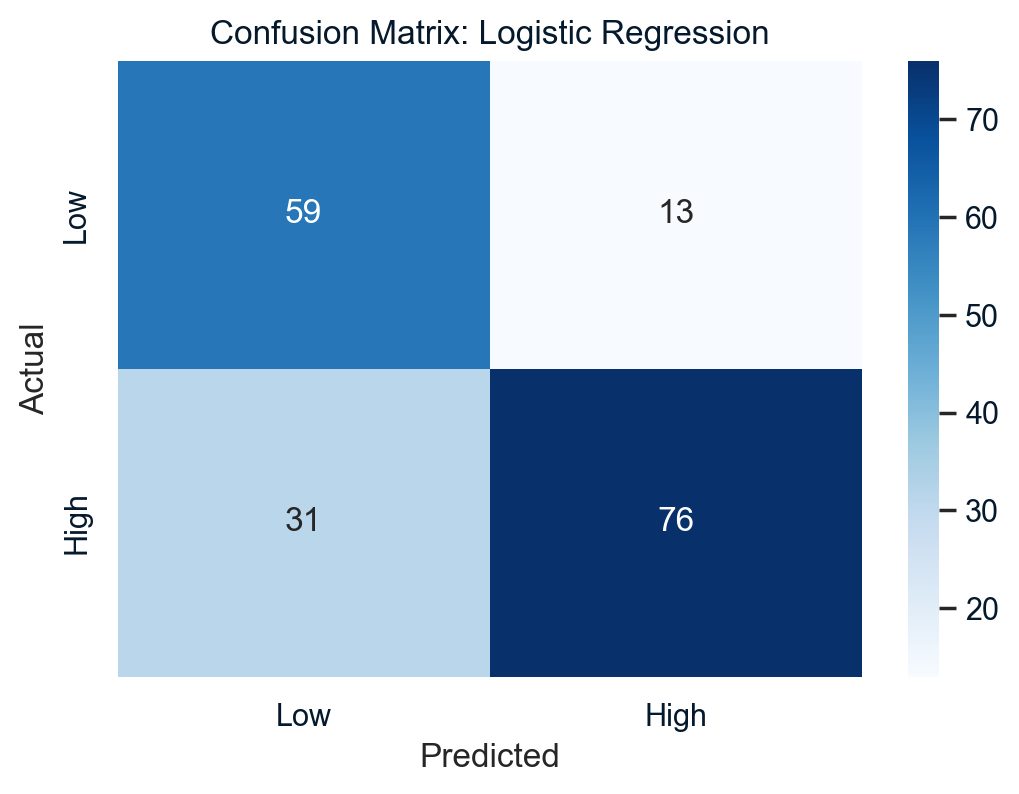

In [187]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000, C =5)

# Fit models
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test_scaler)

# Evaluate models using metrics
def evaluate_model(y_test, y_pred, model, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("-" * 50)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate baseline models
evaluate_model(y_test, y_pred_log_reg, log_reg, "Logistic Regression")


## Baseline Model: Random Forest


Random Forest Evaluation:
Accuracy: 0.6983
Precision: 0.7789
Recall: 0.6916
F1-Score: 0.7327
AUC: 0.7000
Confusion Matrix:
 [[51 21]
 [33 74]]
--------------------------------------------------


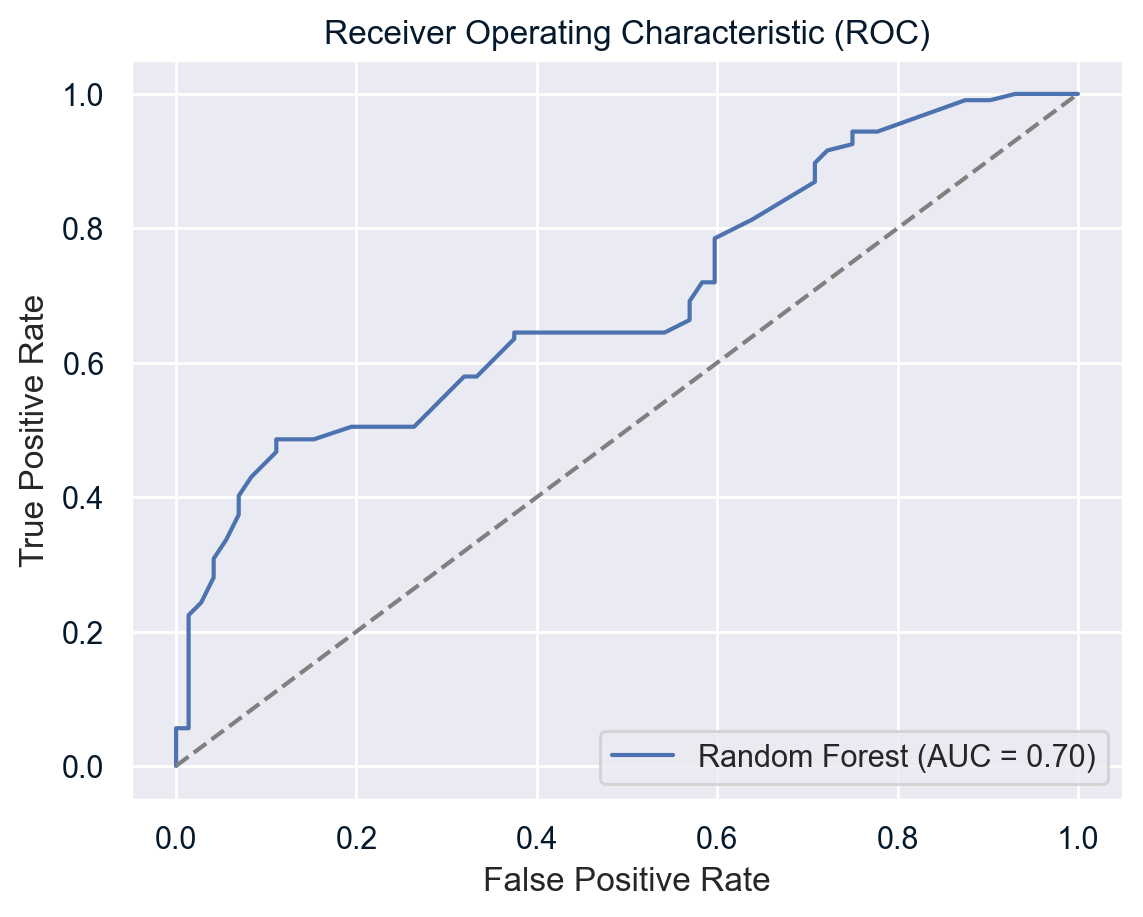

In [188]:
# Initialize models
rf = RandomForestClassifier(random_state=42)

# Fit models
rf.fit(X_train_scaler, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test_scaler)

# Evaluate models using metrics
evaluate_model(y_test, y_pred_rf, rf, "Random Forest")


## Baseline Model : LGBM Classifier

LGBM model Evaluation:
Accuracy: 0.6704
Precision: 0.7449
Recall: 0.6822
F1-Score: 0.7122
AUC: 0.6675
Confusion Matrix:
 [[47 25]
 [34 73]]
--------------------------------------------------


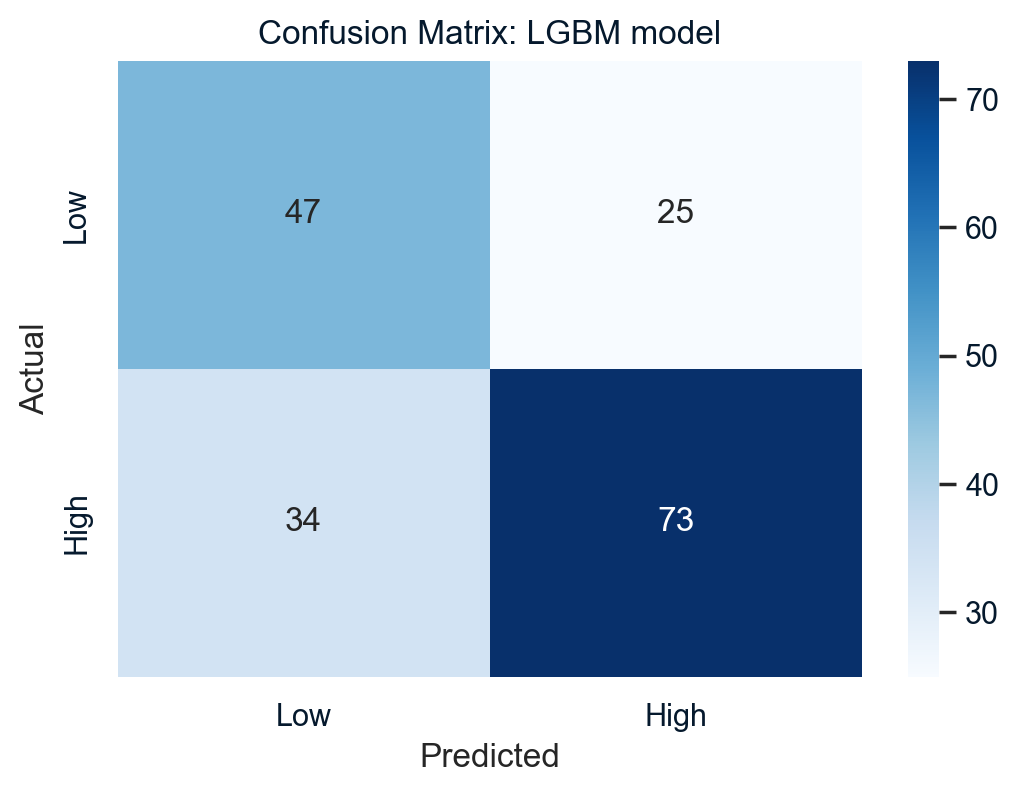

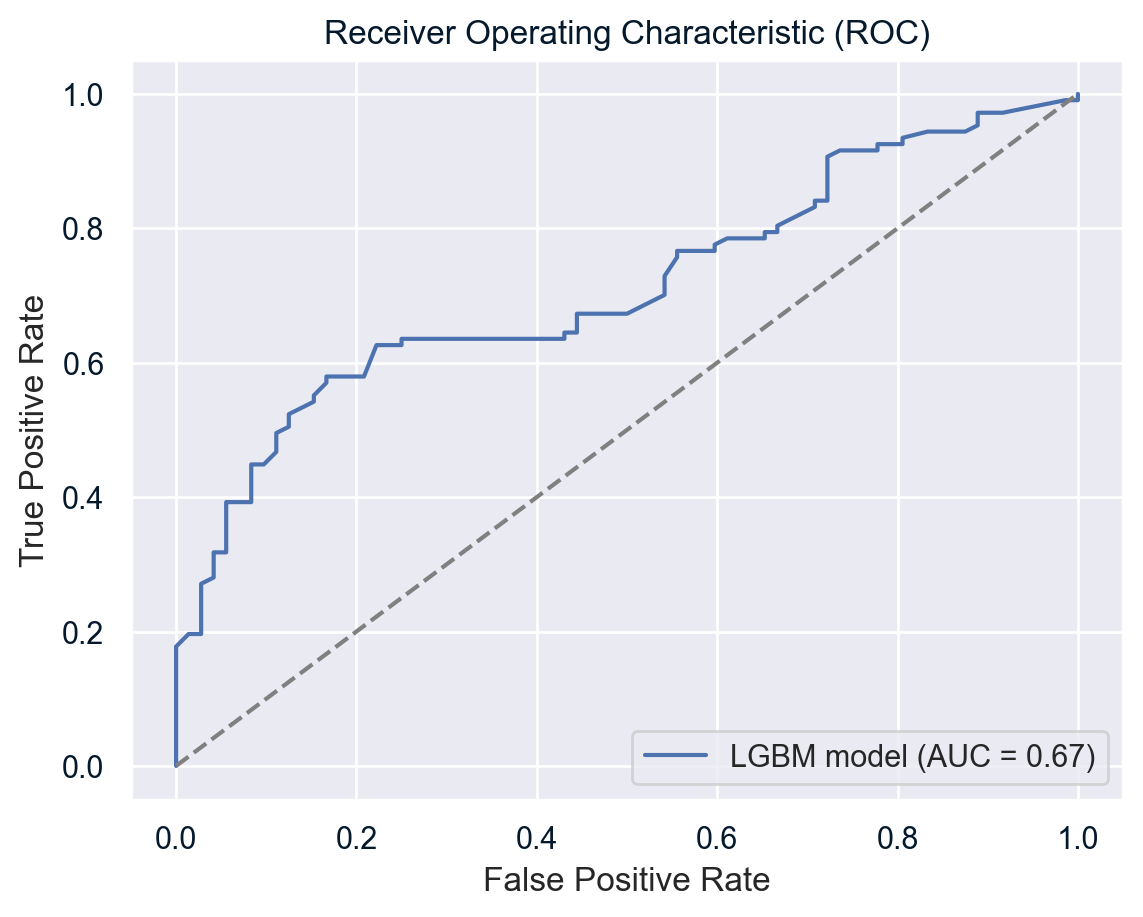

In [186]:
lgb_model = lgb.LGBMClassifier(n_estimators=100)

# Train the model
lgb_model.fit(X_train_scaler, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test_scaler)

# Evaluate the model

evaluate_model(y_test, y_pred_lgb, lgb_model, "LGBM model")


## Hyperparameter Optimization: LGBM Classifier

The baseline LGBM classifier has the highest recall in our case. The business goal is to predict High traffic 80% of the times. Hence, we will use hyperparameter optimziation to improve this.

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 20, 'num_leaves': 31}
LGBM with Best Hyperparameters Evaluation:
Accuracy: 0.7318
Precision: 0.7521
Recall: 0.8224
F1-Score: 0.7857
AUC: 0.7098
Confusion Matrix:
 [[43 29]
 [19 88]]
--------------------------------------------------


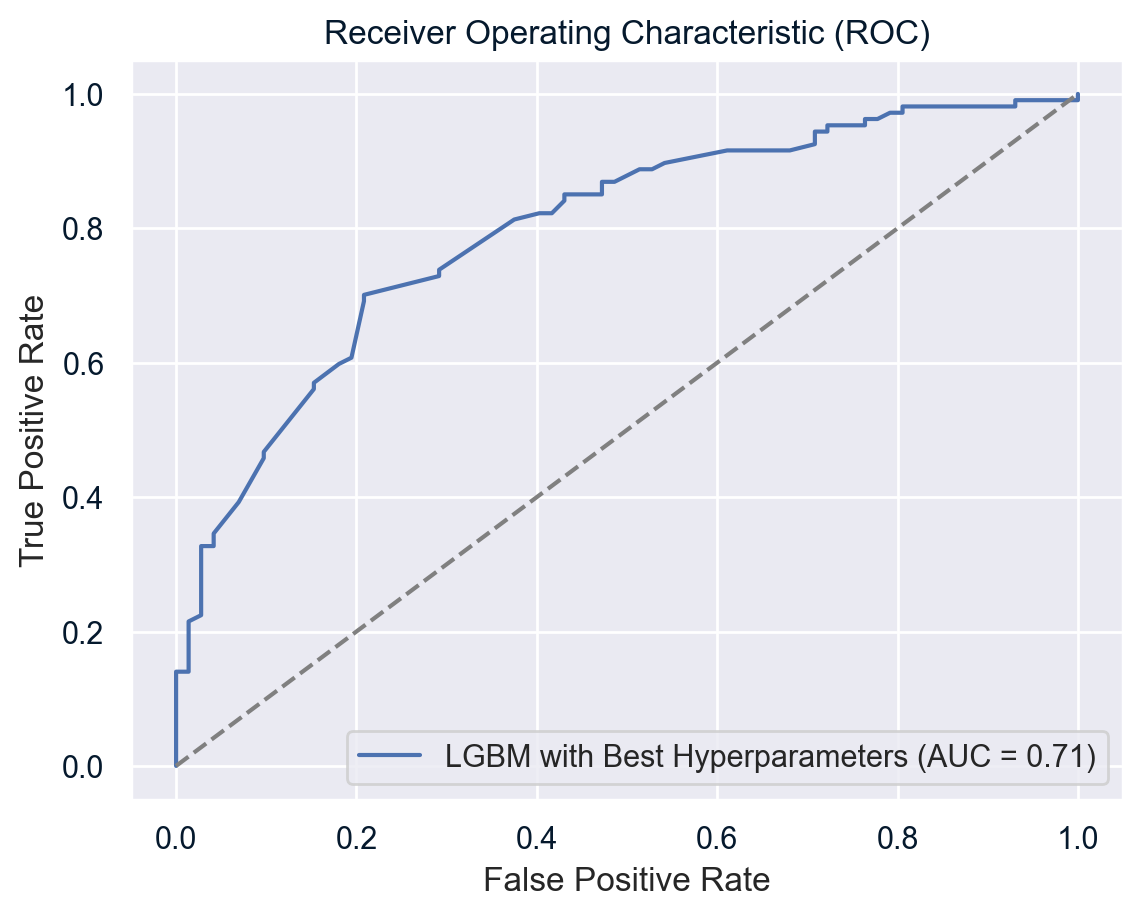

In [184]:
# Hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [20, 40, 100],
    'max_depth': [-1, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42), param_grid=param_grid, 
                           scoring='recall', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Use best model to predict
best_lgb_model = grid_search.best_estimator_
y_pred_best = best_lgb_model.predict(X_test)
evaluate_model(y_test, y_pred_best, best_lgb_model, "LGBM with Best Hyperparameters")

# 5. Business Focus and Metrics:

### The business goals are:
1. Predict recipes with high traffic.
2. Achieve an 80% probability of predicting 'High' traffic for recipes.

The LGBM model has achieved the goals with high accuracy and recall.  

## Define a Monitoring Metric
The monitoring metric in this case is Precision, which measures the proportion of correctly predicted positive instances (high-traffic recipes) out of all instances predicted as positive.

Formula:

$$\text{Precision}
=
\dfrac{\text{True Positives}}{\text{True Positives + False Positives}}
$$
 
In this case, precision helps minimize showing unpopular recipes by ensuring that the model doesn't incorrectly classify recipes as high-traffic when they are not.

### Set a Baseline for the Metric
We will set a baseline for precision based on current data. Let's assume that based on the current dataset and model evaluation, the precision value is 80%.

##  Estimate Metric Values
For future monitoring, we'll track precision to ensure the model's performance meets the business requirements (>80%).

## KPI and performance comparison of different models:

We will compare the baseline logistic regression, Random Forest models and the best LGBM models in terms of the KPIs. 



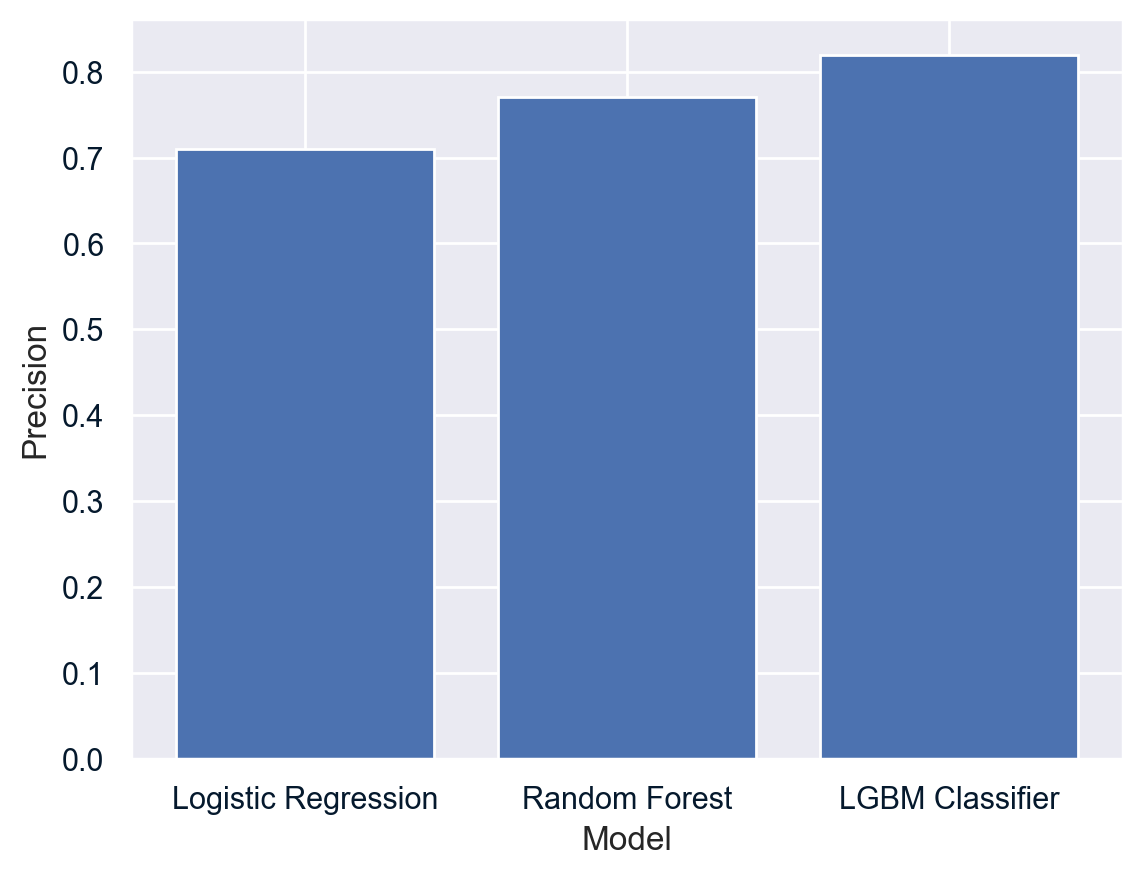

In [189]:
model1_precision =  0.71
model2_precision = 0.77
model3_precision = 0.82

model_names = ['Logistic Regression', 'Random Forest', 'LGBM Classifier']
x = range(len(model_names))
precisions = [model1_precision, model2_precision, model3_precision]
plt.bar(x, precisions, tick_label=model_names)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.show()

# 6. Recommendations 

## Summarize Findings 
- **Business Metric:** **Precision** is used to ensure that only high-traffic recipes are shown, reducing the chances of promoting unpopular recipes.
- **Best-performing model**: The LGBM model performed the best, achieving a precision score of 82%, which satisfies the business requirement. 
-   **Features** most predictive of high traffic: The most important features for predicting high-traffic recipes include:  Calories Carbohydrates Sugar Protein 

   
## Recommendations 

To implement and improve the model, I will consider the following steps:

1. Deployment Strategy: Explore optimal deployment strategies for the machine learning model in terms of performance and cost-effectiveness. Consider deploying it on edge devices for convenience and security, and test the model with newly hired product analysts.
2. Regular Model Retraining: Implement a system for regular model retraining. As user preferences may change over time, it is essential to keep the model up-to-date with the latest data to maintain its predictive accuracy.
3. Collect More Data: e.g. time to make, cost per serving, ingredients, site duration time (how long users were at the recipe page), income links (from what sites users came to the recipe page), combinations of recipes (what recipes user visited at the same session with the current recipe).
4. Balance Data Categories: The dataset contains a class imbalance between low and high-traffic recipes. To address this issue, we suggest collecting additional data for the minority class (low-traffic recipes) or applying data augmentation techniques to balance the dataset.


# 7. Conclusions

Predicting popular recipes for the homepage is a valuable step toward achieving the company's business goals. Our machine learning models offer a data-driven approach that can significantly improve the recipe selection process. By tracking the suggested KPI and implementing our recommendations, we can expect to see positive results in terms of website traffic and subscriptions.

